In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pandas as pd

In [32]:
folder_path = r'C:\Users\daV\Documents\ZHAW\HS 2024\dPoDL\dPoDL\experiments\filtered-search\cnns\cifar10\categorical'
sequences = []

# Load all CSVs and extract sequences of loss values
for filename in [i for i in os.listdir(folder_path) if i.endswith(".csv")]:
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        try:
            data = pd.read_csv(file_path)
            if len(data) >= 3: 
                values_temp = data['Loss'].values
                if max(values_temp) < 2 and min(values_temp) > 0:  # make sure data makes sense
                    sequences.append(values_temp)
        except Exception as e:
            print(e, filename)


### Conditions when to stop:
- values start to increase -> max increase allowed: 0.005 for 3 epochs straight
- values don't decrease sufficiently -> min decrease: 0.003

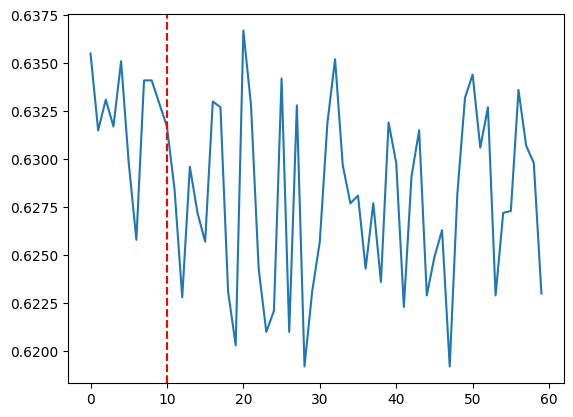

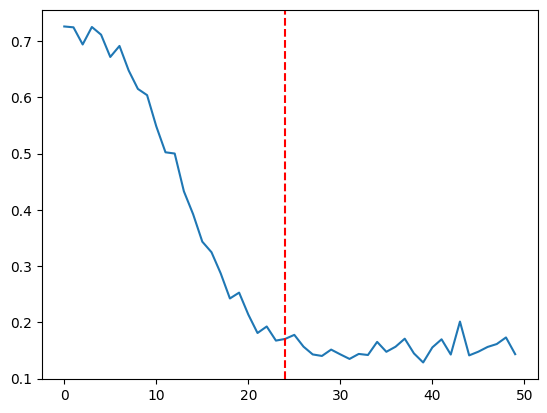

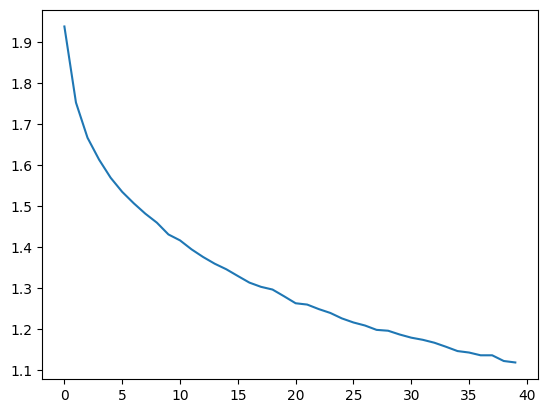

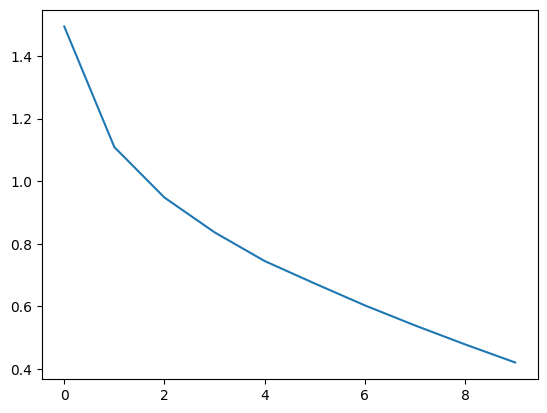

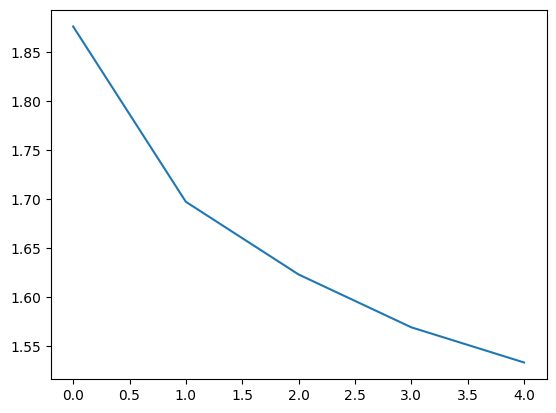

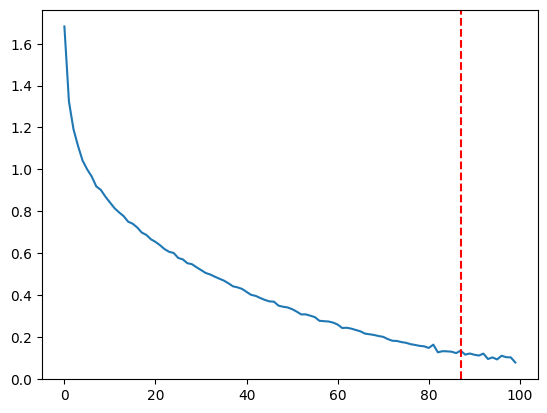

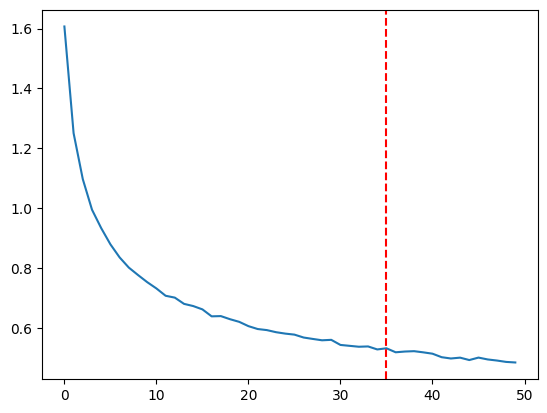

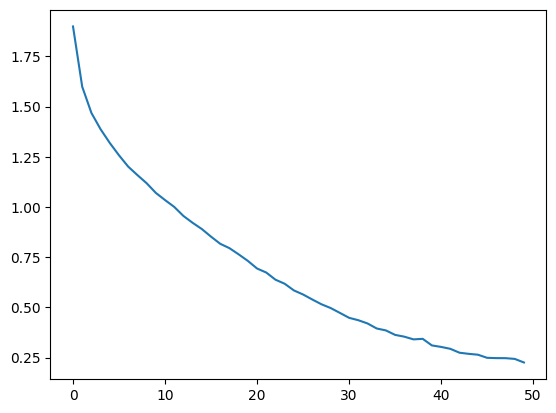

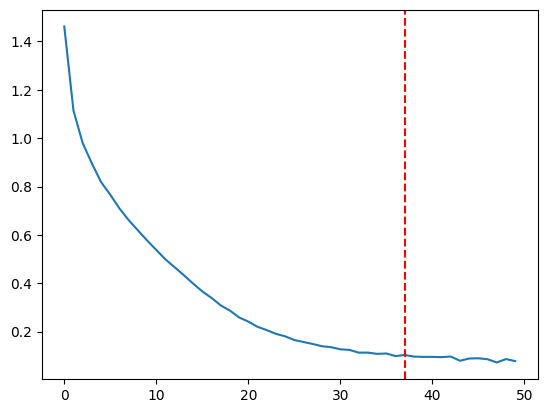

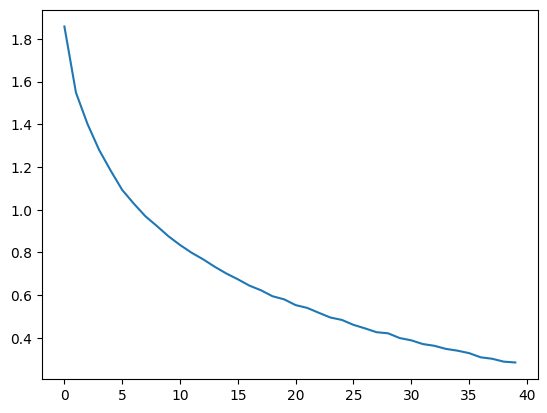

In [34]:
MIN_DECREASE = -0.001
MAX_INCREASE = 0.0005
WINDOW = 10
SLACK_RATE_DECREASE, SLACK_RATE_INCREASE = 0.3, 0.5
SLACK_RATE_DECREASE, SLACK_RATE_INCREASE = SLACK_RATE_DECREASE * WINDOW, SLACK_RATE_INCREASE * WINDOW

def find_stabilization_point(sequence):
    """
    Identifies the point at which the sequence stops significantly decreasing.
    
    :param sequence: List of float values (the sequence to analyze)
    :param change_threshold: The threshold for determining a "significant" change between consecutive values
    :param oscillation_window: Number of previous values to consider when determining oscillation behavior
    :return: The index of the first value where the sequence stops significantly decreasing, or None if not found
    """
    
    if len(sequence) < 2:
        return None  # A sequence with less than 2 values can't have a significant decrease
    
    changes = []  # List to track the relative changes in values
    
    for i in range(1, len(sequence)):
        change = (sequence[i] - sequence[i-1]) / abs(sequence[i-1])
        changes.append(change)
    
    # Check if consecutive changes are consistently smaller than the threshold
    stable_count = 0
    for i in range(WINDOW, len(changes)):
        # Consider the last few changes for oscillation detection
        # check for increasing behaviour:
        if [change > MAX_INCREASE for change in changes[i-WINDOW: i]].count(True) >= SLACK_RATE_INCREASE:
            return i-WINDOW

        # check for decreasing behaviour:
        if [change > MIN_DECREASE for change in changes[i-WINDOW: i]].count(True) >= SLACK_RATE_DECREASE:
            return i
            
    return  # No stabilization point found

# Example usage:
random.seed()
for sequence in random.sample(sequences, 10):
    stable_point = find_stabilization_point(sequence)
    plt.plot(sequence)
    if stable_point:
        plt.axvline(x=stable_point, color='r', linestyle='--', label='stable_point')
    plt.show()


# to-do
- placement of report, e.g. double descent erwähnen, modular anwendung auch für zukunft andere anwendungsfälle
- vortrag helmut letzte Januarwoche im IDP
- mechanismus dass predicted "halluzinogen" wenn genug confident
- zusammensetzen der teile!
- report beginnen zu schreiben